Plik cached_tsneFT_d01_frame_I300_6d6155aa8781c9b602022b3bfa0921699cc286f4.txt nie istnieje.
Nowy plik cached_tsneFT_d01_frame_I300_6d6155aa8781c9b602022b3bfa0921699cc286f4.txt
Plik cached_AC_d01_frame_I300_3c25cf1e110d8d334ff3cbc899fcbbf8f4935478.txt nie istnieje.
Nowy plik cached_AC_d01_frame_I300_3c25cf1e110d8d334ff3cbc899fcbbf8f4935478.txt


C:\Users\5c1cz\AppData\Local\Temp\ipykernel_5764\3442563297.py:34: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(tsne[index, 0], tsne[index, 1], s=5, c=color,
C:\Users\5c1cz\AppData\Local\Temp\ipykernel_5764\3442563297.py:34: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(tsne[index, 0], tsne[index, 1], s=5, c=color,


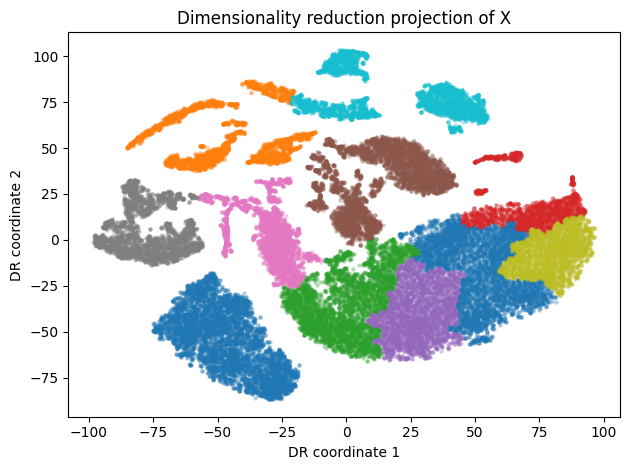

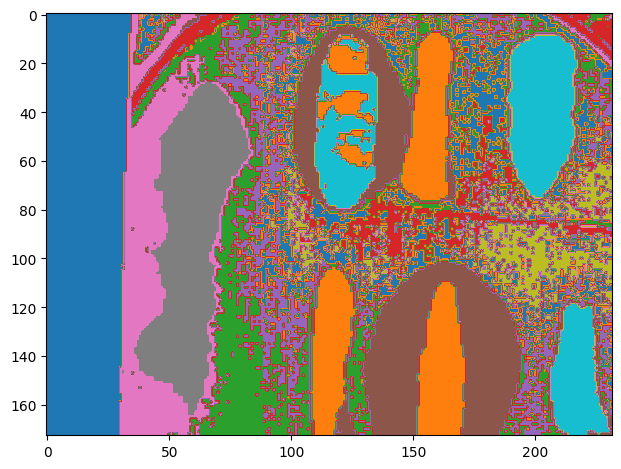

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.linalg as la
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import accuracy_score
from sklearn.cluster import AgglomerativeClustering
from FileSystemCache import FileSystemCache

if __name__ == '__main__':
    fname = 'd01_frame_I300'
    #fname = 'd01_comparison_I350'
    record = np.load(f'{fname}.npz')
    

    data = record['data']
    X = np.reshape(data, (-1, data.shape[-1]))
    n_components = 2
    tsne = FileSystemCache(TSNE(n_components=n_components).fit_transform, f"cached_tsneFT_{fname}").set_dependencies(n_components).execute(X)

    n_clusters = 12
    linkage = "complete"
    # Result has to be serializable
    cached_closure = lambda: AgglomerativeClustering(linkage=linkage, n_clusters=n_clusters).fit(tsne).labels_
    # execute() arguments will be passed to the lambda and used as dependencies on default
    # if your arguments are not serializable, you may opt out of using them as dependencies by switching args_hashed to false and substitute behavior in set_dependencies
    labels = FileSystemCache(cached_closure, filename=f"cached_AC_{fname}").set_dependencies(tsne, linkage, n_clusters).execute()

    plt.figure('Clustering scatterplot')
    for i, label in enumerate(set(labels)):
        index = labels == label
        color = plt.cm.tab10(label / (n_clusters - 1))
        plt.scatter(tsne[index, 0], tsne[index, 1], s=5, c=color, 
                    alpha=0.25, cmap=plt.cm.tab10)
    plt.xlabel('DR coordinate 1')
    plt.ylabel('DR coordinate 2')
    plt.title('Dimensionality reduction projection of X')
    plt.tight_layout()
    
    plt.figure('Clustering image')
    labels2 = np.reshape(labels, data.shape[:2])
    plt.imshow(labels2, cmap=plt.cm.tab10)
    plt.tight_layout()
    plt.show()    
    